In [5]:
#install cv2

In [7]:
import cv2 #used to grayscale and resize images 
import numpy as np #dealing with arrays 
import os #deal with directories 
from random import shuffle #mixing up our currently ordered data that might lead our network astray in training 
from tqdm import tqdm #a nice pretty percentage bar for tasks.  

from PIL import Image
import matplotlib.pyplot as plt

In [9]:
TRAIN_DIR= 'C:/Users/Hp/Downloads/dogs-vs-cats/train/train'
TEST_DIR = 'C:/Users/Hp/Downloads/dogs-vs-cats/test1/test1'
IMG_SIZE = 50

In [10]:
def label_img(img): 
    word_label = img.split('.')[-3]
    #conversion to binary array [cat,dog]
    # [cat, not dog]
    if word_label == 'cat': return [1,0]
    # [not cat, dog]
    elif word_label == 'dog': return [0,1] 

def create_train_data(): 
    training_data = [] 
    for img in tqdm(os.listdir(TRAIN_DIR)): 
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data) 
    np.save('train_data.npy', training_data)
    return training_data

In [11]:
train_data = create_train_data()

100%|██████████| 25000/25000 [03:10<00:00, 131.30it/s]
C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [12]:
#does the same thing for unlabeled test data 
def process_test_data(): 
    testing_data = [] 
    for img in tqdm(os.listdir(TEST_DIR)): 
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) 
        testing_data.append([np.array(img), img_num])
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [13]:

##Split training and testing data
train = train_data[:-500]
test = train_data[-500:]

In [14]:
def reshape_response(Y): 
    train_Y = [] 
    for i in Y: 
        if i[0]==1 and i[1]==0:
            train_Y.append(1)
        else: 
            train_Y.append(0) 
    n = len(train_Y)
    train_Y = np.array(train_Y).reshape((n,1))
    return train_Y

def flatten_features(X): 
    container = []
    m,n,p,q = np.shape(X)
    for i in range(0,m): 
        temp = X[i].flatten()
        container.append(temp)
    flat_array = np.vstack(container)
    return flat_array


In [15]:
##Create data arrays, split into feature and response 
trainX = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1) 
trainX = flatten_features(trainX)
trainY = [i[1] for i in train]
trainY = reshape_response(trainY)

testX = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
testX = flatten_features(testX)
testY = [i[1] for i in test]
testY = reshape_response(testY)

In [23]:
#import the model from sklearn
from sklearn.linear_model import LogisticRegression
#Make an instance of the model
logreg = LogisticRegression()

In [24]:
logreg.fit(trainX,trainY.ravel())

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
score = logreg.score(testX,testY)
print(score)

0.536


In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

In [27]:
cm = metrics.confusion_matrix(testY, predictions)
print(cm)

[[121 133]
 [ 99 147]]


Text(0.5, 1.0, 'Accuracy Score: 0.536')

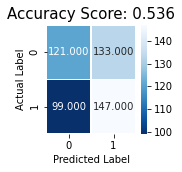

In [28]:
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)